# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following [link](https://edimension.sutd.edu.sg/webapps/blackboard/content/listContent.jsp?course_id=_5582_1&content_id=_200537_1).


## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project. You are free to edit or add more cells if needed

## Students Submission
*Include a short sentence summarizing each member’s contribution.*

Student's Name:
- Davin Handreas Chen
- Thong Zi Qi
- Catherine Laura Danandjaja Antoni
- Wong Jun Han, Brayden
- Ryan Leow Heng Kuan (Liao Xingguang)

### <span style="color:#D2D0A0">**Problem Statement**</span>

#### <span style="color:#9EBC8A">Background description of the problem:</span>

Under the Singapore Green Plan 2030, food waste has emerged as a critical environmental and social challenge. The F&B sector alone generates over one-third of the country’s total food waste annually, yet predictive measures remain underutilized. There is a growing push to forecast food waste patterns across different types of restaurants to inform policy, technology interventions, and consumer education campaigns. 

However, multiple factors complicate this effort. Many restaurants are reluctant to adopt digital food waste tracking systems due to fears of reputational harm, regulatory exposure, and consumer backlash. Cultural practices, such as overproduction in buffet-style dining or "face-saving" banquets, further normalize excess and limit the perceived urgency of reform. Additionally, incentive misalignment between industry and government continues to hinder systemic innovation and accountability. 

To address this issue, this project proposes the use of a Multiple Linear Regression (MLR) model to predict the amount of food waste generated by restaurants based on factors such as: 

- Type of dining establishment (buffet, casual, fine dining, catering) 
- Daily customer volume 
- Seasonal factors (e.g. festive periods, Ramadan, Chinese New Year) 
- Number of dishes prepared per day 
- Price per customer 
- Whether a digital tracking system is in use 
- Awareness and training level of kitchen staff 
- Location (central vs. heartland) 
- Business incentives (e.g. tax rebates, green certifications) 
- Cultural events or obligations (e.g. weddings, company dinners) 

By identifying which variables most strongly predict future food waste, the model can support more targeted interventions—such as policy recommendations, incentive restructuring, or targeted education—while also offering a lens to understand how deep-rooted behaviours, beliefs, and economic pressures shape sustainability outcomes. 

#### <span style="color:#73946B">User Persona</span>

#### <span style="color:#537D5D">Problem Statement using “how might we ...” statement</span>
"How might we predict the amount of food waste generated at events or restaurants based on operational, environmental, and economic factors such as quantity of food prepared, number of guests, event type, and pricing strategy—so as to enable data-driven planning and minimize unnecessary waste?"

### Dataset

- Describe your dataset.
- Put the link to the sources of your raw dataset.
- Put python codes for loading the data into pandas dataframe(s). The data should be the raw data downloaded from the source. No pre-processing using any software (excel, python, etc) yet. Include this dataset in your submission
- Explain each column of your dataset (can use comment or markdown)
- State which column is the dependent variable (target) and explain how it is related to your problem statement
- State which columns are the independent variables (features) and describe your hypothesis on why these features can predict the target variable

### Dataset

#### Link for dataset
`https://www.kaggle.com/datasets/trevinhannibal/food-wastage-data-in-restaurant`

#### Description of dataset
This dataset contains comprehensive data on food wastage from a specific restaurant located in India.The dataset aims to provide valuable insights into the patterns and magnitude of food waste generated by the restaurant, contributing to efforts in reducing food waste and promoting sustainability in the food industry.

In [685]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import numpy as np

In [686]:
url = './datasets/food_wastage_data.csv'
df = pd.read_csv(url)

In [687]:
df.head()

,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
0,Meat,310,Corporate,450,Refrigerated,Regular,All Seasons,Buffet,Urban,Low,25
1,Meat,400,Birthday,500,Room Temperature,Regular,Winter,Buffet,Suburban,High,40
2,Vegetables,302,Birthday,371,Refrigerated,Regular,Summer,Buffet,Suburban,Low,27
3,Meat,491,Birthday,497,Refrigerated,Regular,All Seasons,Finger Food,Rural,High,32
4,Meat,300,Corporate,400,Refrigerated,Regular,Winter,Finger Food,Urban,Moderate,25


#### Independent Variables 
- Quantity of Food 
- Number of Guests
- Event Type
- Type of Food 
- Storage Conditions
- Purchase History
- Seasonality
- Preparation Method
- Geographical Location
- Pricing 

#### Dependent Variables
- Wastage Food Amount

Last column in the dataset is our dependent variable as we are calculating food waste amount based on other variables.

### Clean & Analyze your data
Use python code to:
- Clean your data
- Calculate Descriptive Statistics and other statistical analysis
- Visualization with meaningful analysis description

In [688]:
# clean data

In [689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Type of Food           1782 non-null   object
 1   Number of Guests       1782 non-null   int64 
 2   Event Type             1782 non-null   object
 3   Quantity of Food       1782 non-null   int64 
 4   Storage Conditions     1782 non-null   object
 5   Purchase History       1782 non-null   object
 6   Seasonality            1782 non-null   object
 7   Preparation Method     1782 non-null   object
 8   Geographical Location  1782 non-null   object
 9   Pricing                1782 non-null   object
 10  Wastage Food Amount    1782 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 153.3+ KB


In [690]:
df.describe()

,Number of Guests,Quantity of Food,Wastage Food Amount
count,1782.000000,1782.000000,1782.000000
mean,317.804714,411.125701,28.536476
std,67.829658,65.204674,10.461317
min,207.000000,280.000000,10.000000
25%,267.000000,350.000000,20.000000
50%,302.000000,400.000000,26.500000
75%,350.000000,480.000000,35.000000
max,491.000000,500.000000,63.000000


In [691]:
# Check for null values
df.isnull().sum()

Type of Food             0
Number of Guests         0
Event Type               0
Quantity of Food         0
Storage Conditions       0
Purchase History         0
Seasonality              0
Preparation Method       0
Geographical Location    0
Pricing                  0
Wastage Food Amount      0
dtype: int64

In [692]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [693]:
# descriptive statistics

In [694]:
target = 'Wastage Food Amount'

# Group categorical data 
# Event Type, Type of Food, Storage Conditions, Purchase History, 
# Seasonality, Preparation Method, Geographical Location, and, Pricing 
categorical_vars = df.select_dtypes(include='object').columns.tolist()

# Group numerical data 
# Quantity of Food, and, Number of Guests
numeric_vars = df.select_dtypes(include='number').drop(columns=[target]).columns.tolist()

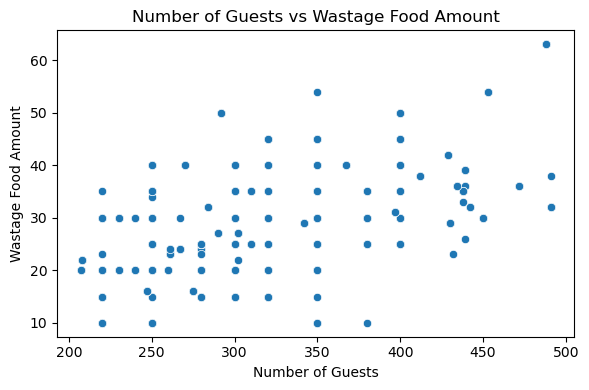

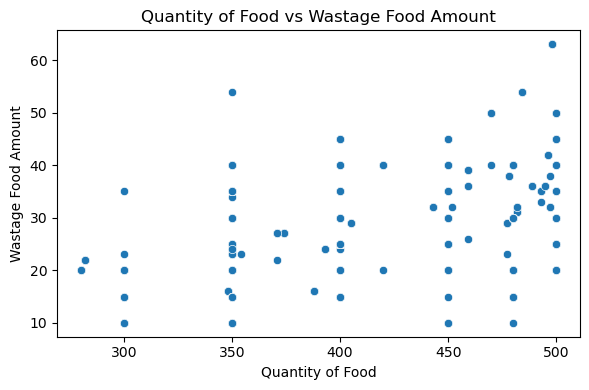

In [695]:
for col in numeric_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y=target)
    plt.title(f'{col} vs {target}')
    plt.tight_layout()
    plt.show()

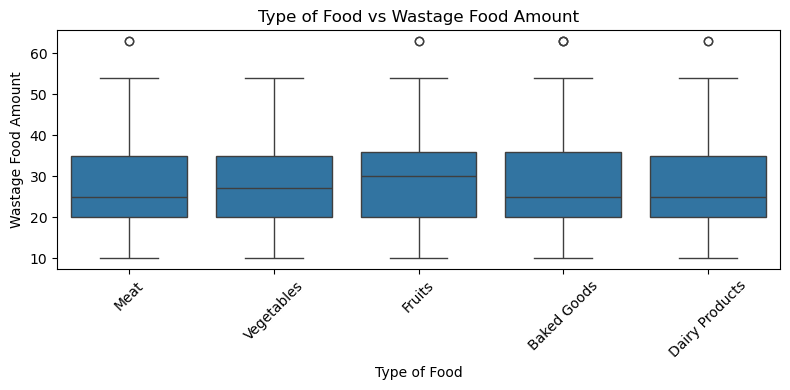

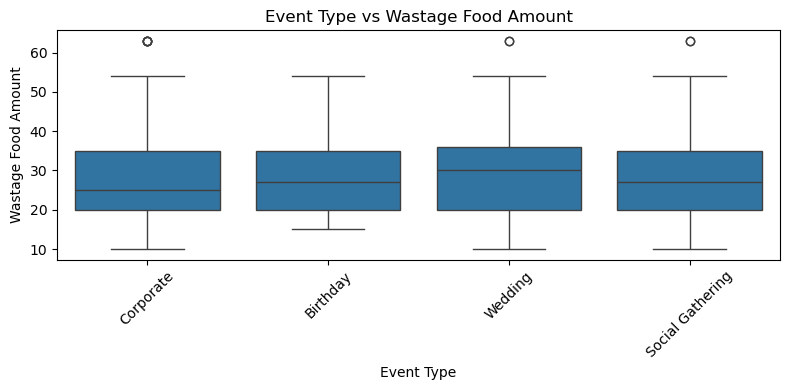

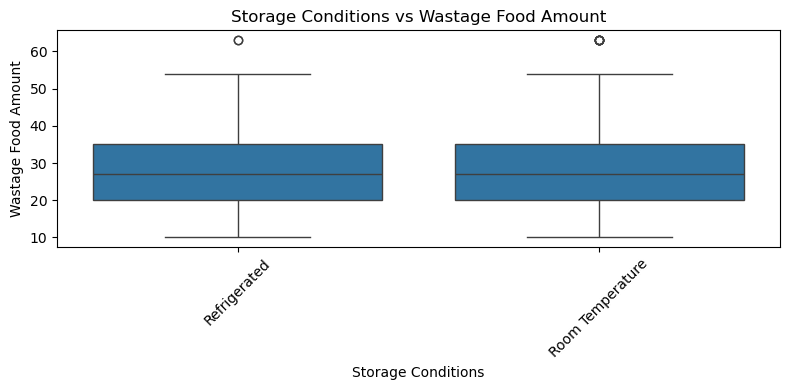

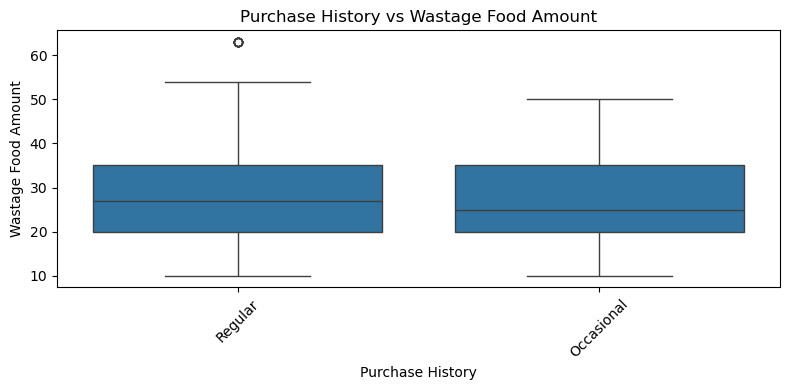

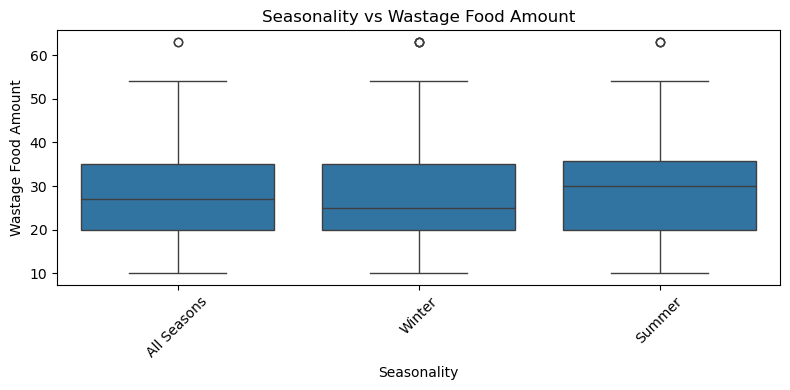

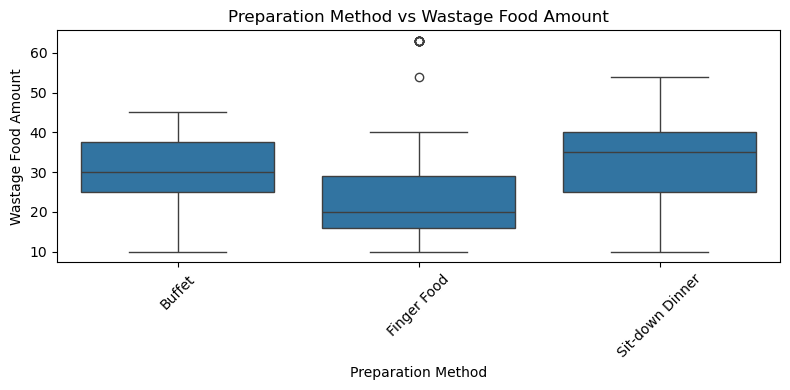

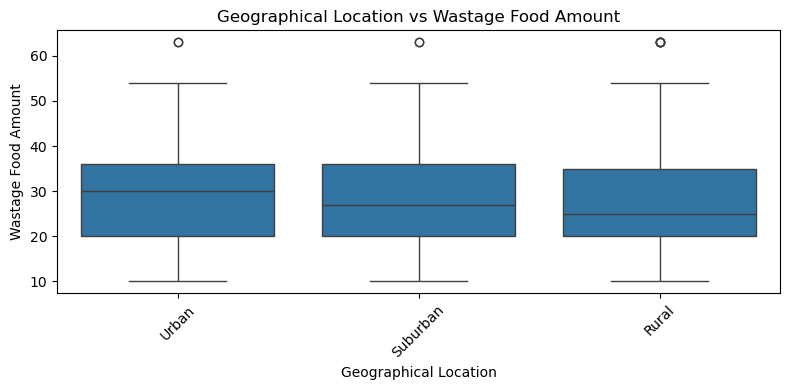

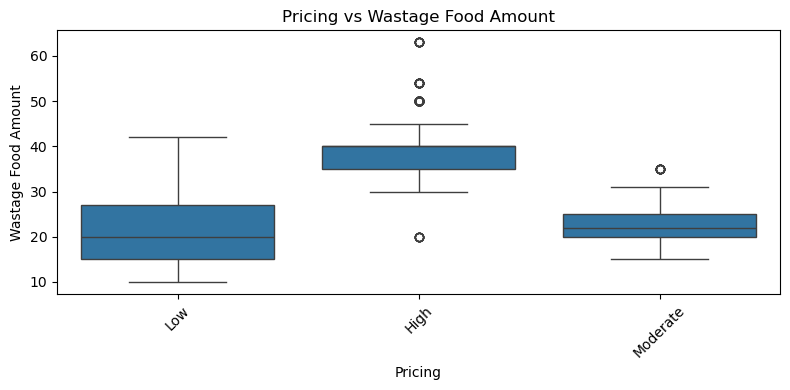

In [696]:
for col in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, y=target)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs {target}')
    plt.tight_layout()
    plt.show()

In [697]:
# visualization with analysis

In [698]:
anova_results = {}
for var in categorical_vars:
    # Group the target variable by each category and extract their values
    groups = [group[target].values for name, group in df.groupby(var)]
    # Perform one-way ANOVA test on the groups
    f_stat, p_val = f_oneway(*groups)
    # Store the p-value for this variable
    anova_results[var] = p_val

# Sort results by significance
anova_results_sorted = dict(sorted(anova_results.items(), key=lambda item: item[1]))
anova_results_sorted

#p-value range meaning:
#< 0.05: Statistically significant: at least one category has a different mean
#> 0.05: Not significant: means are likely similar across all categories

{'Pricing': np.float64(4.193194656361023e-308),
 'Preparation Method': np.float64(1.5192634528575712e-67),
 'Geographical Location': np.float64(0.0010101632508487612),
 'Purchase History': np.float64(0.22803981570371198),
 'Type of Food': np.float64(0.3478398425952728),
 'Storage Conditions': np.float64(0.4455574762823885),
 'Seasonality': np.float64(0.49161547848756004),
 'Event Type': np.float64(0.5039966532127035)}

#### Choosing independent variables
- Based on the ANOVA test, variables `Seasonality, Storage Conditions, Purchase History, Event Type` are eliminated. We keep `Type of Food` as it's just slightly higher than the acceptable range.
- Therefore, the acceptable variables are: 
    - Pricing
    - Prepararion Method
    - Geographical Location
    - Type of Food
    - Number of guests
    - Quantity of Food

In [699]:
independent_variable = ['Type of Food', 'Event Type', 'Preparation Method', 'Pricing', 'Number of Guests', 'Quantity of Food']
ideal_df = df[independent_variable]
ideal_df.count()

Type of Food          1618
Event Type            1618
Preparation Method    1618
Pricing               1618
Number of Guests      1618
Quantity of Food      1618
dtype: int64

#### One-hot encoding for categorical data

In [700]:
df_encoded = pd.get_dummies(ideal_df, drop_first=True).astype(int)
df_encoded

,Number of Guests,Quantity of Food,Type of Food_Dairy Products,Type of Food_Fruits,Type of Food_Meat,Type of Food_Vegetables,Event Type_Corporate,Event Type_Social Gathering,Event Type_Wedding,Preparation Method_Finger Food,Preparation Method_Sit-down Dinner,Pricing_Low,Pricing_Moderate
0,310,450,0,0,1,0,1,0,0,0,0,1,0
1,400,500,0,0,1,0,0,0,0,0,0,0,0
2,302,371,0,0,0,1,0,0,0,0,0,1,0
3,491,497,0,0,1,0,0,0,0,1,0,0,0
4,300,400,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,491,497,0,0,1,0,0,1,0,1,0,0,0
1777,310,350,0,0,0,0,1,0,0,1,0,0,0
1778,284,443,0,0,0,0,0,1,0,0,0,1,0
1779,220,300,0,1,0,0,0,0,1,1,0,0,1


In [701]:
from scipy import stats
# Remove Outliers for Numerical data (Z > 3)
df = df[(np.abs(stats.zscore(df.select_dtypes(include=[float, int]))) < 3).all(axis=1)]

#### Multicollinear Test

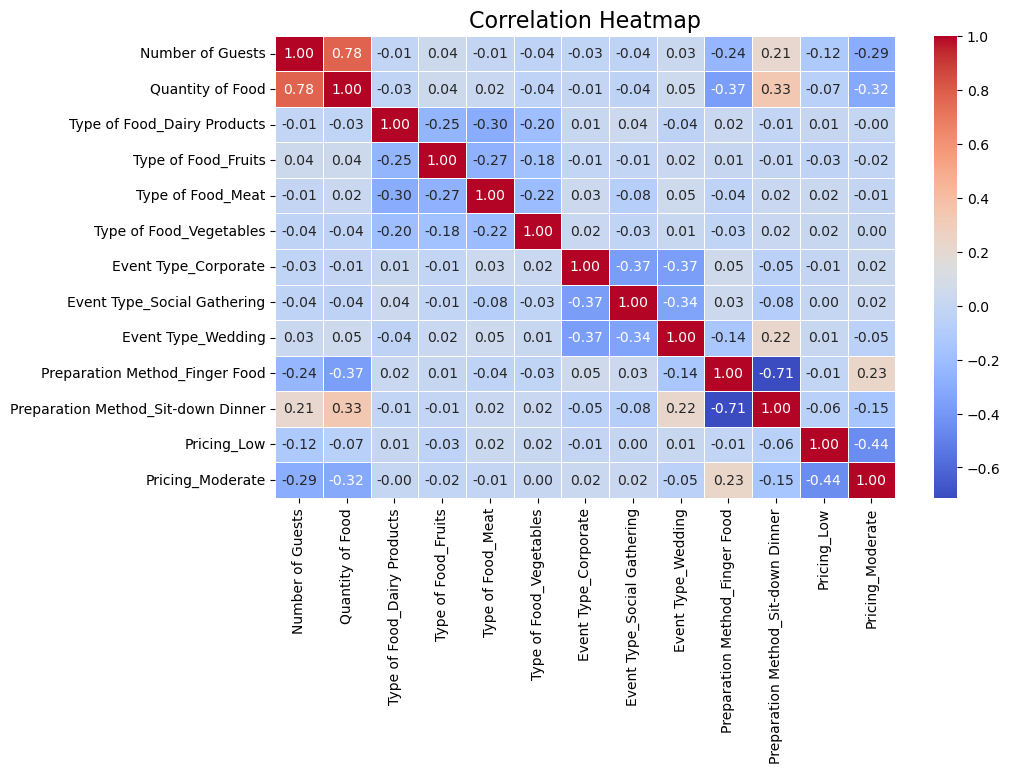

In [702]:
# Correlation matrix
corr_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title for the heatmap
plt.title("Correlation Heatmap", fontsize=16)

# Show the heatmap
plt.show()

In [703]:
independent_variables = pd.get_dummies(df[['Type of Food', 'Event Type', 'Preparation Method', 'Pricing', 'Number of Guests']], drop_first=True).astype(int)
dependent_variable = df[['Wastage Food Amount']]

In [704]:
numeric_vars.remove('Quantity of Food')

In [705]:
# Inline Z-score normalization for 'Number of Guests'
mean_guests = independent_variables['Number of Guests'].mean()
std_guests = independent_variables['Number of Guests'].std()
independent_variables['Number of Guests'] = (independent_variables['Number of Guests'] - mean_guests) / std_guests


In [710]:
independent_variables

,Number of Guests,Type of Food_Dairy Products,Type of Food_Fruits,Type of Food_Meat,Type of Food_Vegetables,Event Type_Corporate,Event Type_Social Gathering,Event Type_Wedding,Preparation Method_Finger Food,Preparation Method_Sit-down Dinner,Pricing_Low,Pricing_Moderate
0,-0.111028,0,0,1,0,1,0,0,0,0,1,0
1,1.233508,0,0,1,0,0,0,0,0,0,0,0
2,-0.230542,0,0,0,1,0,0,0,0,0,1,0
3,2.592984,0,0,1,0,0,0,0,1,0,0,0
4,-0.260421,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1776,2.592984,0,0,1,0,0,1,0,1,0,0,0
1777,-0.111028,0,0,0,0,1,0,0,1,0,0,0
1778,-0.499450,0,0,0,0,0,1,0,0,0,1,0
1779,-1.455564,0,1,0,0,0,0,1,1,0,0,1


In [711]:
dependent_variable

,Wastage Food Amount
0,25
1,40
2,27
3,32
4,25
...,...
1776,32
1777,35
1778,32
1779,15


##### Intepretation

From the multicollinear test, we realized that `Numer of Guests` and `Quantity of Food` are linearly dependent. Therefore, we remove `Quantity of Food` from the selected independent variables. 

##### Conclusion

Independent Variables: 
- Number of Guests
- Type of Food 
- Preparation Method
- Geographical Location
- Pricing 

Dependent Variables:
- Wastage Food Amount

### Features and Target Preparation

Prepare features and target for model training.

In [706]:
# put Python code to prepare your features and target
from utils.SplitData import split_data

ir_train, ir_test, dr_train, dr_test = split_data(independent_variables, dependent_variable, random_state=100, test_size=0.5)
display(ir_train.describe())
display(ir_test.describe())
display(dr_train.describe())
display(dr_test.describe())

,Number of Guests,Type of Food_Dairy Products,Type of Food_Fruits,Type of Food_Meat,Type of Food_Vegetables,Event Type_Corporate,Event Type_Social Gathering,Event Type_Wedding,Preparation Method_Finger Food,Preparation Method_Sit-down Dinner,Pricing_Low,Pricing_Moderate
count,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,0.003958,0.201242,0.172671,0.263354,0.130435,0.281988,0.263354,0.240994,0.387578,0.434783,0.255901,0.357764
std,0.981445,0.401178,0.378197,0.440727,0.336991,0.450247,0.440727,0.427952,0.487500,0.496037,0.436638,0.479640
min,-1.649775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.633903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.230542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.486544,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,2.592984,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Number of Guests,Type of Food_Dairy Products,Type of Food_Fruits,Type of Food_Meat,Type of Food_Vegetables,Event Type_Corporate,Event Type_Social Gathering,Event Type_Wedding,Preparation Method_Finger Food,Preparation Method_Sit-down Dinner,Pricing_Low,Pricing_Moderate
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,-0.003963,0.228856,0.201493,0.228856,0.121891,0.287313,0.252488,0.261194,0.380597,0.460199,0.253731,0.383085
std,1.018835,0.420358,0.401365,0.420358,0.327363,0.452791,0.434710,0.439559,0.485836,0.498724,0.435417,0.486441
min,-1.649775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.843053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.260421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.486544,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.592984,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Wastage Food Amount
count,805.000000
mean,28.429814
std,10.206895
min,10.000000
25%,20.000000
50%,27.000000
75%,35.000000
max,54.000000


,Wastage Food Amount
count,804.000000
mean,28.442786
std,10.005003
min,10.000000
25%,20.000000
50%,25.000000
75%,35.000000
max,54.000000


### Building Model

Use python code to build your model. Give explanation on this process.

In [707]:
# put Python code to build your model

### Evaluating the Model

- Describe the metrics of your choice
- Evaluate your model performance

In [708]:
# put Python code to test & evaluate the model

### Improving the Model

- Improve the models by performing any data processing techniques or hyperparameter tuning.
- You can repeat the steps above to show the improvement as compared to the previous performance

Note:
- You should not change or add dataset at this step
- You are allowed to use library such as sklearn for data processing (NOT for building model)
- Make sure to have the same test dataset so the results are comparable with the previous model 
- If you perform hyperparameter tuning, it will require you to split your training data further into train and validation dataset

In [709]:
# Re-iterate the steps above with improvement

### Discussion and Analysis

- Analyze the results of your metrics.
- Explain how does your analysis and machine learning help to solve your problem statement.
- Conclusion